What steps we are going to follow:
1) Building a data pipeline
2) Preprocessiong images for DL
3) Creating a deep CNN classifier
4) Evaluation model performance
5) Saving the model for deployment

### Loading required libraries and frameworks

In [35]:
import os
import cv2
import imghdr
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt 

### To Remove dodgy/Unreliable/unimportant images

In [36]:
data_dir = 'data' 

In [37]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [38]:
# function to  remove irrelevant images from the data
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image) 
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

# 3. Load Data

In [39]:
# We will load data using keras utility which would preprocess and labelled data and make it ready for futher process
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [40]:
data_iterator = data.as_numpy_iterator()

In [41]:
batch = data_iterator.next()

In [42]:
batch[0].shape

(32, 256, 256, 3)

In [43]:
print(len(batch)) 

2


In [44]:
batch[0] # iamges in terms of array

array([[[[255.        , 255.        , 255.        ],
         [255.        , 255.        , 255.        ],
         [255.        , 255.        , 255.        ],
         ...,
         [255.        , 255.        , 255.        ],
         [255.        , 255.        , 255.        ],
         [255.        , 255.        , 255.        ]],

        [[255.        , 255.        , 255.        ],
         [255.        , 255.        , 255.        ],
         [255.        , 255.        , 255.        ],
         ...,
         [255.        , 255.        , 255.        ],
         [255.        , 255.        , 255.        ],
         [255.        , 255.        , 255.        ]],

        [[255.        , 255.        , 255.        ],
         [255.        , 255.        , 255.        ],
         [255.        , 255.        , 255.        ],
         ...,
         [255.        , 255.        , 255.        ],
         [255.        , 255.        , 255.        ],
         [255.        , 255.        , 255.        ]],

In [45]:
batch[1] # lables happy(0) and sad(1)

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1])

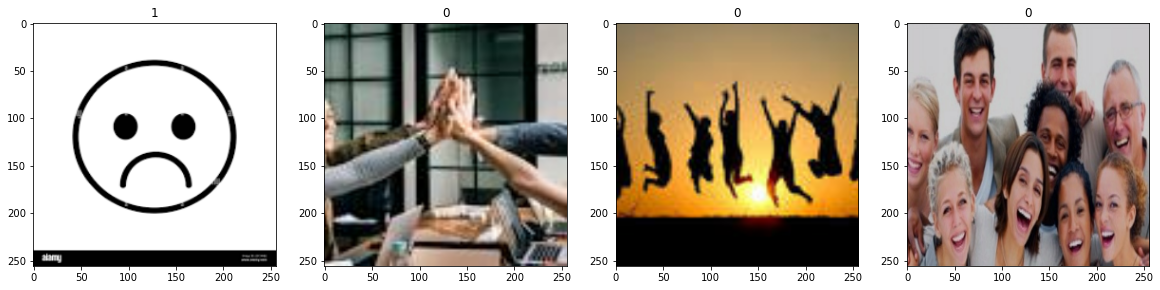

In [46]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

### Preprocess data

###  Scale Data

In [47]:
# Normalization
data = data.map(lambda x,y: (x/255, y))

In [48]:
data.as_numpy_iterator().next()

(array([[[[0.1264706 , 0.16568628, 0.1872549 ],
          [0.11666667, 0.16764706, 0.19901961],
          [0.10392157, 0.15490197, 0.18627451],
          ...,
          [0.21372549, 0.28039217, 0.3509804 ],
          [0.20294118, 0.26960784, 0.33235294],
          [0.21078432, 0.27745098, 0.34019607]],
 
         [[0.11666667, 0.15588236, 0.17745098],
          [0.11372549, 0.16470589, 0.19607843],
          [0.10980392, 0.16078432, 0.19215687],
          ...,
          [0.21862745, 0.28529412, 0.35588235],
          [0.22156863, 0.2882353 , 0.3509804 ],
          [0.21960784, 0.28627452, 0.34901962]],
 
         [[0.13137256, 0.17058824, 0.19215687],
          [0.11372549, 0.16470589, 0.19607843],
          [0.10980392, 0.16078432, 0.19215687],
          ...,
          [0.2127451 , 0.27941176, 0.35      ],
          [0.22058824, 0.28921568, 0.3509804 ],
          [0.22745098, 0.29411766, 0.35686275]],
 
         ...,
 
         [[0.3745098 , 0.3627451 , 0.3647059 ],
          [0.59215

### Split Data

In [49]:
# Spliting the data in train ,test and validation
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [50]:
print(train_size)
print(val_size)
print(test_size)

7
2
1


In [51]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

### Build Deep neural network /deep learining model

In [52]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [53]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [54]:
model = Sequential()

In [55]:
from tensorflow import keras

In [56]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [57]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [58]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 16)      

# 7. Train

In [59]:
logdir='logs'

In [60]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [61]:
hist = model.fit(train,epochs=5, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/5
7/7 [==============================] - 14s 1s/step - loss: 1.3971 - accuracy: 0.4554 - val_loss: 0.7203 - val_accuracy: 0.4844
Epoch 2/5
7/7 [==============================] - 11s 1s/step - loss: 0.6827 - accuracy: 0.5625 - val_loss: 0.6812 - val_accuracy: 0.6875
Epoch 3/5
7/7 [==============================] - 13s 2s/step - loss: 0.6739 - accuracy: 0.6473 - val_loss: 0.6584 - val_accuracy: 0.6719
Epoch 4/5
7/7 [==============================] - 12s 1s/step - loss: 0.6013 - accuracy: 0.7188 - val_loss: 0.5076 - val_accuracy: 0.8906
Epoch 5/5
7/7 [==============================] - 12s 1s/step - loss: 0.4953 - accuracy: 0.7768 - val_loss: 0.4084 - val_accuracy: 0.8438


# 8. Plot Performance

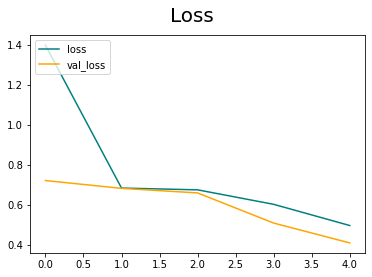

In [62]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

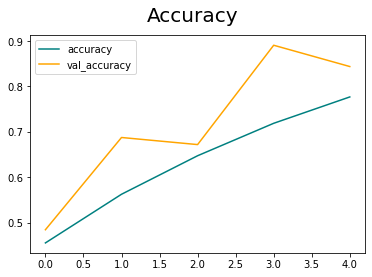

In [63]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

### Model Evaluation

In [64]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [65]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [66]:
# In order to check accuracy we are going to loop through each batch of testing data
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 254ms/step


In [67]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.8888889, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.9411765, shape=(), dtype=float32)


### Testing the model for data

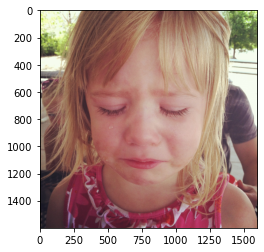

In [74]:
img = cv2.imread('sadgirl.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

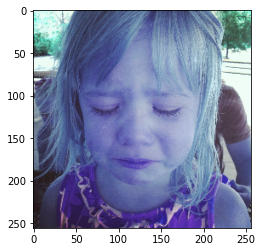

In [75]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int).astype(int))
plt.show()

In [76]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 47ms/step


In [77]:
yhat

array([[0.61084265]], dtype=float32)

In [78]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


### Saving the Model

In [79]:
# To save model so that we can use it whenever we want
from tensorflow.keras.models import load_model

In [80]:
model.save(os.path.join('models','happysadmodel.h5'))

### How to use model again?

In [81]:
new_model = load_model(os.path.join('models','happysadmodel.h5'))

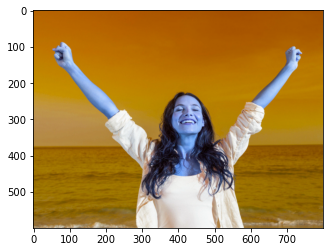

In [82]:
img = cv2.imread('happygirl.png')
plt.imshow(img) # cause open cv read it as BGR rather than RGB thats why we need to convert this 
plt.show()

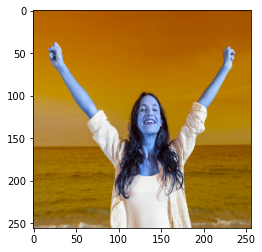

In [83]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int).astype(int))
plt.show()

In [84]:
yhatimpmodel=new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 116ms/step


In [85]:
yhatimpmodel

array([[0.19200501]], dtype=float32)

In [86]:
if yhatimpmodel > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy
